<a href="https://colab.research.google.com/github/KelllyLadino24/Estimaci-n-del-ndice-de-rea-foliar-aplicando-t-cnicas-de-machine-learning/blob/main/ADABOOST_PRIMERA_CAMPA%C3%91A_TODOS_LOS_DESCRIPTORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ADABOOST/ TODOS LOS DESCRIPTORES
## BASE DE DATOS PDT
# 70% ENTRENAMIENTO, 30% PRUEBA
# PRIMERA CAMPAÑA BRINDADA EL 12/05/2021 HASTA 15/09/2021
# AUTOR: KELLY LADINO

In [ ]:
!pip install utm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
import seaborn as ns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#cargar datset
df = pd.read_csv("/PTD - Hoja 1 (2).csv",decimal=',')
#descripción conjunto de datos.
df.describe()


,DAP,LAI STD,NVDI STD,LAI AVG,NDVI AVG,TIPO RIEGO,LONG,LAT,PRECIPITACIÓN DIARIA ACOMULADA,TEMPERATURA SECA MAXIMA DIARIA ACOMULADA,TEMPERATURA SECA MINIMA DIARIA ACOMULADA,HUMEDAD RELATIVA MAXIMA DIARIA ACOMULADA
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000
mean,80.666667,0.556665,0.048177,3.947014,0.553048,2.000000,-74.962108,4.189491,86.333333,1463.40000,1484.466667,5597.333333
std,14.869126,0.407523,0.035817,1.036339,0.051020,0.819346,0.000252,0.000333,56.635831,255.83855,308.028487,1151.371138
min,64.000000,0.008165,0.004257,1.880000,0.404524,1.000000,-74.962637,4.188824,38.600000,1163.40000,1141.800000,4324.000000
25%,64.000000,0.263917,0.023802,3.125000,0.523495,1.000000,-74.962298,4.189223,38.600000,1163.40000,1141.800000,4324.000000
50%,78.000000,0.431843,0.039792,3.686667,0.551949,2.000000,-74.962115,4.189480,54.800000,1440.20000,1425.000000,5363.000000
75%,100.000000,0.752003,0.057548,4.760833,0.583927,3.000000,-74.961934,4.189747,165.600000,1786.60000,1886.600000,7105.000000
max,100.000000,2.667912,0.217813,6.443333,0.662581,3.000000,-74.961577,4.190171,165.600000,1786.60000,1886.600000,7105.000000


In [ ]:
# Seleccionamos las características para el modelo
data = df[['LAI AVG', 'NDVI AVG','DAP', 'LAI STD','NVDI STD','TIPO RIEGO','LAT','LONG', 'PRECIPITACIÓN DIARIA ACOMULADA','TEMPERATURA SECA MAXIMA DIARIA ACOMULADA','TEMPERATURA SECA MINIMA DIARIA ACOMULADA','HUMEDAD RELATIVA MAXIMA DIARIA ACOMULADA']]
data.head()

,LAI AVG,NDVI AVG,DAP,LAI STD,NVDI STD,TIPO RIEGO,LAT,LONG,PRECIPITACIÓN DIARIA ACOMULADA,TEMPERATURA SECA MAXIMA DIARIA ACOMULADA,TEMPERATURA SECA MINIMA DIARIA ACOMULADA,HUMEDAD RELATIVA MAXIMA DIARIA ACOMULADA
0,3.830000,0.540156,64,0.156418,0.048238,2,4.190171,-74.962037,38.6,1440.2,1141.8,4324.0
1,3.080000,0.568095,64,0.664881,0.039807,2,4.189994,-74.961954,38.6,1440.2,1141.8,4324.0
2,3.430000,0.471131,64,0.212289,0.081748,2,4.190020,-74.962139,38.6,1440.2,1141.8,4324.0
3,3.476667,0.608532,64,0.398358,0.039223,2,4.189876,-74.962037,38.6,1440.2,1141.8,4324.0
4,3.366667,0.567165,64,0.440101,0.032736,3,4.190047,-74.961862,38.6,1440.2,1141.8,4324.0


In [ ]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   LAI AVG                                   144 non-null    float64
 1   NDVI AVG                                  144 non-null    float64
 2   DAP                                       144 non-null    int64  
 3   LAI STD                                   144 non-null    float64
 4   NVDI STD                                  144 non-null    float64
 5   TIPO RIEGO                                144 non-null    int64  
 6   LAT                                       144 non-null    float64
 7   LONG                                      144 non-null    float64
 8   PRECIPITACIÓN DIARIA ACOMULADA            144 non-null    float64
 9   TEMPERATURA SECA MAXIMA DIARIA ACOMULADA  144 non-null    float64
 10  TEMPERATURA SECA MINIMA DIARIA ACOMULA

In [ ]:
X = data.loc[:,['NDVI AVG','DAP', 'LAI STD','NVDI STD','TIPO RIEGO','LAT','LONG', 'PRECIPITACIÓN DIARIA ACOMULADA','TEMPERATURA SECA MAXIMA DIARIA ACOMULADA','TEMPERATURA SECA MINIMA DIARIA ACOMULADA','HUMEDAD RELATIVA MAXIMA DIARIA ACOMULADA']]
y = data.loc[:,['LAI AVG']]

In [ ]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop('LAI AVG', axis = 'columns'),
                                        data['LAI AVG'],
                                        train_size   = 0.7,
                                        random_state = 42,
                                        shuffle      = True)

In [ ]:
X_train

,NDVI AVG,DAP,LAI STD,NVDI STD,TIPO RIEGO,LAT,LONG,PRECIPITACIÓN DIARIA ACOMULADA,TEMPERATURA SECA MAXIMA DIARIA ACOMULADA,TEMPERATURA SECA MINIMA DIARIA ACOMULADA,HUMEDAD RELATIVA MAXIMA DIARIA ACOMULADA
28,0.557890,64,0.122474,0.026069,3,4.189523,-74.962200,38.6,1440.2,1141.8,4324.0
40,0.557705,64,0.204179,0.034840,3,4.189267,-74.962354,38.6,1440.2,1141.8,4324.0
86,0.662581,78,1.240063,0.030311,2,4.189227,-74.962637,54.8,1163.4,1425.0,5363.0
24,0.484722,64,0.172498,0.081726,2,4.189648,-74.962377,38.6,1440.2,1141.8,4324.0
25,0.549270,64,0.312552,0.075093,2,4.189450,-74.962297,38.6,1440.2,1141.8,4324.0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.553268,78,1.094928,0.033600,1,4.189348,-74.961819,54.8,1163.4,1425.0,5363.0
106,0.537971,100,0.168193,0.041352,1,4.189773,-74.961772,165.6,1786.6,1886.6,7105.0
14,0.497963,64,0.441135,0.113085,2,4.189756,-74.962307,38.6,1440.2,1141.8,4324.0
92,0.499253,78,0.843682,0.068415,1,4.189135,-74.962175,54.8,1163.4,1425.0,5363.0


In [ ]:
y_train

28     2.640000
40     4.876667
86     5.083333
24     2.946667
25     3.216667
         ...   
71     5.550000
106    3.126667
14     3.400000
92     4.440000
102    3.956667
Name: LAI AVG, Length: 100, dtype: float64

In [ ]:
print("Partición de entrenamiento")
print("---------------------------")
print(y_train.describe())

Partición de entrenamiento
---------------------------
count    100.000000
mean       3.929100
std        1.027554
min        2.423333
25%        3.070000
50%        3.670000
75%        4.780000
max        6.436667
Name: LAI AVG, dtype: float64


In [ ]:
print("Partición de test")
print("------------------------------")
print(y_test.describe())

Partición de test
------------------------------
count    44.000000
mean      3.987727
std       1.066899
min       1.880000
25%       3.286667
50%       3.823333
75%       4.479167
max       6.443333
Name: LAI AVG, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Regressor= AdaBoostRegressor(random_state=0, n_estimators=100)
Regressor.fit(X_train, y_train)
y_pred=Regressor.predict(X_test)

In [ ]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_pred':y_pred})
predictions.head()

,y_test,y_pred
117,3.573333,3.509645
19,2.986667,3.066111
82,4.466667,5.107308
97,3.610000,3.508750
56,5.796667,5.475000


<BarContainer object of 44 artists>

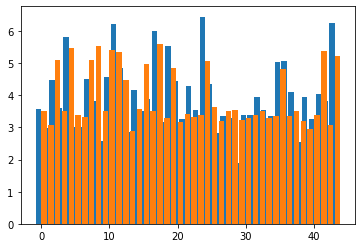

In [ ]:
fig, ax = plt.subplots()
co = np.arange((len(y_test)))
an = 0.80
ax.bar(co-an/2,y_test, an)
ax.bar(co+an/2,y_pred, an)


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error=', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error=',np.sqrt(metrics.mean_squared_error (y_test, y_pred))) 
print('R2=', metrics.r2_score(y_test, y_pred))

Mean Absolute Error= 0.5876085779004652
Mean Squared Error= 0.5735916624585973
Root Mean Squared Error= 0.7573583448134689
R2= 0.4843672251879336


In [ ]:
Regressor.score(X_test, y_test)

0.4843672251879336